In [104]:
# import tensorflow as tf
# device = tf.config.list_physical_devices('GPU')
# # tf.config.experimental.set_memory_growth(device[6],True)
# gpus = tf.config.list_physical_devices('GPU')
# for i in range(len(gpus)):
# 	tf.config.experimental.set_memory_growth(device[i], True)
# # tf.debugging.set_log_device_placement(True)

# device
# # a = tf.config.set
# # tf.config.set_visible_devices(device[7], 'GPU')

In [145]:
import numpy as np
import os

In [146]:
#  actions, data
file_root = 'dataset/'
file_list = os.listdir(file_root)
actions = np.load(file_root+'labels.npy')
print(file_list)
print(actions)

['seq_20231103_research (2)_연구.npy', 'seq_20231103_research (8)_연구.npy', 'seq_20231103_master (3)_석사.npy', 'seq_20231103_research (4)_연구.npy', 'seq_20231103_master (5)_석사.npy', 'seq_20231103_research (1)_연구.npy', 'seq_20231103_research (7)_연구.npy', 'seq_20231103_research (9)_연구.npy', 'labels.npy', 'seq_20231103_research (10)_연구.npy', 'seq_20231103_master (7)_석사.npy', 'seq_20231103_master (1)_석사.npy', 'seq_20231103_research (6)_연구.npy', 'seq_20231103_master (4)_석사.npy', 'seq_20231103_master (9)_석사.npy', 'seq_20231103_research (5)_연구.npy', 'seq_20231103_master (6)_석사.npy', 'seq_20231103_master (2)_석사.npy', 'seq_20231103_research (3)_연구.npy', 'seq_20231103_master (8)_석사.npy']
['석사' '연구']


In [147]:
files = []
for f in file_list:
    if f[:3] == 'seq':
        files.append(f)
len(files)

19

# 데이터 셋 구성
- 예시 (이전코드)
```python
    actions = [
        'come',
        'away',
        'spin'
    ]

    data = np.concatenate([
        np.load('dataset/seq_come_1627646273.npy'),
        np.load('dataset/seq_away_1627646273.npy'),
        np.load('dataset/seq_spin_1627646273.npy')
    ], axis=0)

    data.shape
```

In [108]:
# actions = [f[4:-4] for f in file_list]
# actions

In [148]:
print(files)
# file_list.pop(46)
data = np.concatenate([np.load(file_root+f) for f in files], axis=0)
print(*data)
# idx= 0
# for f in file_list:
#     print(f'{idx}번째 : file name is {f} - {np.load(file_root+f).shape}')
#     idx += 1

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
   9.08750000e+01  1.00000000e+00]
 [ 3.65413785e-01  6.00061297e-01 -4.03723107e-07 ...  4.40312500e+01
   9.85625000e+01  1.00000000e+00]
 [ 3.69141489e-01  6.09455168e-01 -4.16091126e-07 ...  3.73750000e+01
   8.80000000e+01  1.00000000e+00]] [[ 3.59848708e-01  5.81774294e-01 -3.45014257e-07 ...  5.80625000e+01
   1.19812500e+02  1.00000000e+00]
 [ 3.64809930e-01  5.92847943e-01 -3.87256620e-07 ...  3.40000000e+01
   9.08750000e+01  1.00000000e+00]
 [ 3.65413785e-01  6.00061297e-01 -4.03723107e-07 ...  4.40312500e+01
   9.85625000e+01  1.00000000e+00]
 [ 3.69141489e-01  6.09455168e-01 -4.16091126e-07 ...  3.73750000e+01
   8.80000000e+01  1.00000000e+00]
 [ 3.80049407e-01  6.12392068e-01 -3.89584329e-07 ...  3.96562500e+01
   9.27500000e+01  1.00000000e+00]] [[ 3.64809930e-01  5.92847943e-01 -3.87256620e-07 ...  3.40000000e+01
   9.08750000e+01  1.00000000e+00]
 [ 3.65413785e-01  6.00061297e-01 -4.03723107e-07 ...  4.40312500e+01
   9.85625000e+01

In [149]:
data.shape

(1183, 5, 266)

In [150]:
x_data = data[:, :, :-1]
labels = data[:, 0,  -1]

print(x_data.shape)
print(labels.shape)
# print(*labels)
print(len(actions))

(1183, 5, 265)
(1183,)
2


# 데이터 입력 전처리
- 예시 (이전코드)
```python
    x_data = data[:, :, :-1]
    labels = data[:, 0, -1]

    print(x_data.shape)
    print(labels.shape)
```

In [151]:
from tensorflow.keras.utils import to_categorical
# actions
y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(1183, 2)

In [152]:
from sklearn.model_selection import train_test_split

time_stamp = 1
x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)
# x_train = x_data.reshape(int(len(x_data)/time_stamp), time_stamp, 265)
# y_train = y_data.reshape(int(len(y_data)/time_stamp), time_stamp, 61)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

print(x_train.shape, y_train.shape)

(1064, 5, 265) (1064, 2)
(119, 5, 265) (119, 2)
(1064, 5, 265) (1064, 2)


In [153]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten


model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3], return_sequences=False),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 64)                84480     
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 2)                 66        
                                                                 
Total params: 86626 (338.38 KB)
Trainable params: 86626 (338.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [115]:
# rm test_data/*

In [116]:
# from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# history = model.fit(
#     x_train,
#     y_train,
# #     validation_data=(x_val, y_val),
#     epochs=200,
#     callbacks=[
#         ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
#         ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
#     ]
# )

In [117]:
# from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# history = model.fit(
#     x_train,
#     y_train,
#     epochs=10,
#     callbacks=[
#         ModelCheckpoint('models/sl_model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
# #         ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
#     ]
# )

In [154]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/sl_model_1.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
31/34 [==========================>...] - ETA: 0s - loss: 0.6085 - acc: 0.9123
Epoch 1: val_acc improved from -inf to 0.91597, saving model to models/sl_model_1.h5
34/34 [==============================] - 3s 20ms/step - loss: 0.5895 - acc: 0.9154 - val_loss: 0.7328 - val_acc: 0.9160 - lr: 0.0010
Epoch 2/200
10/34 [=======>......................] - ETA: 0s - loss: 0.1813 - acc: 0.9500

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


33/34 [============================>.] - ETA: 0s - loss: 0.2195 - acc: 0.9309
Epoch 2: val_acc did not improve from 0.91597
34/34 [==============================] - 0s 13ms/step - loss: 0.2205 - acc: 0.9305 - val_loss: 0.2948 - val_acc: 0.8992 - lr: 0.0010
Epoch 3/200
32/34 [===========================>..] - ETA: 0s - loss: 0.1912 - acc: 0.9541
Epoch 3: val_acc improved from 0.91597 to 0.94118, saving model to models/sl_model_1.h5
34/34 [==============================] - 0s 13ms/step - loss: 0.1887 - acc: 0.9539 - val_loss: 0.2102 - val_acc: 0.9412 - lr: 0.0010
Epoch 4/200
30/34 [=========================>....] - ETA: 0s - loss: 0.0990 - acc: 0.9615
Epoch 4: val_acc improved from 0.94118 to 0.95798, saving model to models/sl_model_1.h5
34/34 [==============================] - 0s 13ms/step - loss: 0.1137 - acc: 0.9577 - val_loss: 0.2512 - val_acc: 0.9580 - lr: 0.0010
Epoch 5/200
31/34 [==========================>...] - ETA: 0s - loss: 0.0731 - acc: 0.9677
Epoch 5: val_acc did not improv

In [155]:
model.save('models/sl_model_v4.h5')

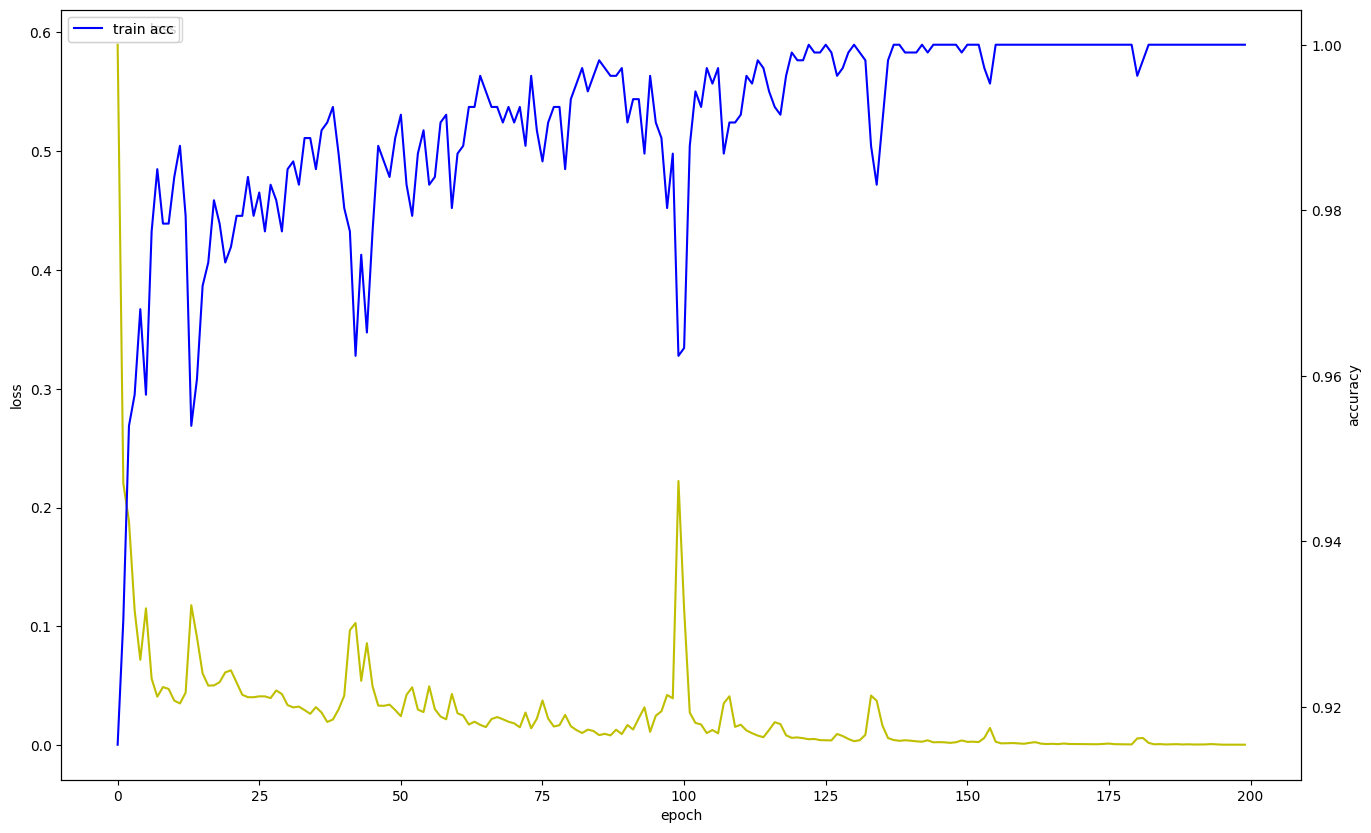

In [156]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
# loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
# acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [143]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/sl_model_v4.h5')

# y_pred = model.predict(x_val)

# multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

In [123]:
import tensorflow as tf

# Convert the model
# converter = tf.lite.TFLiteConverter.from_saved_model('models/sl_model.h5') # path to the SavedModel directory
# tflite_model = converter.convert()

converter = tf.lite.TFLiteConverter.from_keras_model(model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter=True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,
tf.lite.OpsSet.SELECT_TF_OPS]

tflite_model = converter.convert()

# Save the model.
with open('models/sl_model_v4.tflite', 'wb') as f:
  f.write(tflite_model)



In [170]:
from collections import defaultdict

# x_train[0]
# test_x = np.load('test_data/seq_20231103_master (0)_석사.npy')
test = np.load('test_data/seq_20231103_master (0)_석사.npy')
print(test.shape)
test_x = test.astype(np.float32)
test_x = test_x[:, :, :-1]
print(test_x.shape)
# test_x = test_x.reshape(int(len(test_x)/1), 1, 265)
y = model.predict(test_x)
y
# # # max(*y)
# # # len(y)
# # # for k in y[0]:
# # #     print(k)
t = list(y)
t
# idx = 0
# maxV = defaultdict(int)
# for i in t:
#     for j in range(len(i)):
#       if i[j] > i[idx]:
#         maxV[idx] += 1
# maxV
# actions[idx]
# actions

(67, 5, 266)
(67, 5, 265)
3/3 [==============================] - 0s 4ms/step


[array([0.00992993, 0.99007004], dtype=float32),
 array([0.02860026, 0.9713997 ], dtype=float32),
 array([0.9469787 , 0.05302135], dtype=float32),
 array([1.0000000e+00, 1.6776941e-14], dtype=float32),
 array([1.0000000e+00, 4.3474305e-16], dtype=float32),
 array([1.0000000e+00, 2.9812704e-16], dtype=float32),
 array([1.000000e+00, 2.419212e-15], dtype=float32),
 array([1.0000000e+00, 5.5912073e-15], dtype=float32),
 array([1.000000e+00, 5.129312e-15], dtype=float32),
 array([1.0000000e+00, 3.4942597e-15], dtype=float32),
 array([1.000000e+00, 2.995853e-15], dtype=float32),
 array([1.0000000e+00, 1.4175073e-15], dtype=float32),
 array([1.0000000e+00, 1.6054927e-15], dtype=float32),
 array([1.0000000e+00, 2.6224462e-15], dtype=float32),
 array([1.0000000e+00, 2.9279282e-15], dtype=float32),
 array([1.000000e+00, 5.303148e-15], dtype=float32),
 array([1.000000e+00, 4.321473e-15], dtype=float32),
 array([1.0000000e+00, 4.4371368e-15], dtype=float32),
 array([1.000000e+00, 4.066359e-15], d

In [193]:
from collections import defaultdict
test_list = os.listdir('test_data/')
test = []
print(actions)
for test_data in test_list:
    # test.append(np.load('test_data/'+test_data))
    if test_data[:3] == "seq":
        t= np.load('test_data/'+test_data)
        test_x = t.astype(np.float32)
        # test_x = test_x[:, :, :-1]
        y = model.predict(test_x)
        idx = 0
        t = list(y[-1])
        # maxV = defaultdict(int)
        # for i in t:
        #     for j in range(len(i)):
        #         if i[j] > 0.8:
        #             maxV[j] += 1
        # print(f'{test_data[-6:-4]} : {maxV}')
        print(f'{test_data[-10:-4]} : {t}')


['석사' '연구']
3/3 [==============================] - 0s 6ms/step
(3)_석사 : [9.11213e-22, 1.0]
3/3 [==============================] - 0s 6ms/step
(1)_연구 : [5.5982273e-08, 1.0]
3/3 [==============================] - 0s 4ms/step
(3)_연구 : [1.0801799e-11, 1.0]
4/4 [==============================] - 0s 3ms/step
(4)_연구 : [1.3317665e-12, 1.0]
2/2 [==============================] - 0s 6ms/step
(4)_석사 : [0.999931, 6.89996e-05]
3/3 [==============================] - 0s 4ms/step
(2)_석사 : [4.921953e-09, 1.0]
2/2 [==============================] - 0s 6ms/step
(1)_석사 : [1.0, 6.3981354e-15]
4/4 [==============================] - 0s 3ms/step
(2)_연구 : [2.13971e-14, 1.0]


In [ ]:
# x_train[0]
test_x = np.load('test_data/seq_20231103_103347_석사.npy')
print(*test_x)
# test_x = test_x.astype(np.float32)
# test_x = data[:, :-1]
# test_x.shape
# test_x = test_x.reshape(int(len(test_x)/1), 1, 265)
# y = model.predict(test_x)
# # # max(*y)
# # # len(y)
# # # for k in y[0]:
# # #     print(k)
# t = list(y[0])
# t
# # idx = 0
# # for i in range(len(t)):
# #     if t[idx] < t[i]:
# #         idx = i
# # print(idx)
# # actions[idx]

[ 2.88650960e-01  4.54140574e-01 -9.20067151e-08  2.83450752e-01
  4.25085038e-01 -1.74491666e-02  2.90977776e-01  3.98849368e-01
 -2.57346518e-02  3.07855248e-01  3.90133023e-01 -3.17503959e-02
  3.21066618e-01  3.86762977e-01 -3.62901613e-02  3.10329705e-01
  3.78567129e-01 -2.22247373e-02  3.29251975e-01  3.51809084e-01
 -3.92986126e-02  3.44006181e-01  3.36510122e-01 -5.13615496e-02
  3.57950598e-01  3.23419809e-01 -5.99384643e-02  3.26524377e-01
  3.93446445e-01 -2.06778906e-02  3.36806953e-01  3.87588620e-01
 -4.03469354e-02  3.23700786e-01  4.03884083e-01 -4.61783521e-02
  3.12210709e-01  4.14488256e-01 -4.75531593e-02  3.37758005e-01
  4.10068482e-01 -2.15034410e-02  3.47380042e-01  4.07968313e-01
 -3.95072959e-02  3.36125463e-01  4.21923012e-01 -3.88631076e-02
  3.26398373e-01  4.30245042e-01 -3.53271961e-02  3.43842983e-01
  4.27265763e-01 -2.40988843e-02  3.51555705e-01  4.28783119e-01
 -3.74899395e-02  3.45076233e-01  4.37564820e-01 -3.83166708e-02
  3.37202847e-01  4.43119

In [ ]:
# x_train[0]
test_x = np.load('dataset/seq_석사.npy')
print(*test_x)
# test_x = test_x.astype(np.float32)
# test_x = data[:, :-1]
# test_x.shape
# test_x = test_x.reshape(int(len(test_x)/1), 1, 265)
# y = model.predict(test_x)
# # # max(*y)
# # # len(y)
# # # for k in y[0]:
# # #     print(k)
# t = list(y[0])
# t
# # idx = 0
# # for i in range(len(t)):
# #     if t[idx] < t[i]:
# #         idx = i
# # print(idx)
# # actions[idx]

[ 5.63916922e-01  7.74336040e-01 -1.09869838e-07  5.36747575e-01
  7.90586054e-01  1.40353700e-03  5.24088025e-01  8.19655240e-01
 -4.98951529e-04  5.22607744e-01  8.49683344e-01 -3.52797564e-03
  5.26919246e-01  8.72393250e-01 -7.70782912e-03  5.27500868e-01
  8.30260754e-01 -4.21687355e-03  5.28936565e-01  8.69808912e-01
 -1.15855746e-02  5.33180952e-01  8.90372515e-01 -1.82225611e-02
  5.36883175e-01  9.06283855e-01 -2.24660020e-02  5.40813684e-01
  8.32938671e-01 -8.39645322e-03  5.42754412e-01  8.72340083e-01
 -1.31445341e-02  5.45106113e-01  8.97256017e-01 -1.75023936e-02
  5.47128260e-01  9.16067600e-01 -2.17691734e-02  5.54419100e-01
  8.33093047e-01 -1.25572449e-02  5.55865049e-01  8.67746770e-01
 -1.64430030e-02  5.56518435e-01  8.89227033e-01 -1.87917370e-02
  5.56774735e-01  9.06182647e-01 -2.14725751e-02  5.67006290e-01
  8.31241488e-01 -1.65757034e-02  5.70663333e-01  8.58005166e-01
 -1.98593121e-02  5.72552979e-01  8.74333680e-01 -2.03990396e-02
  5.74374557e-01  8.88303